In [1]:
# 3層CNNから畳み込みNN（CNN）へ


In [4]:

import tensorflow
from tensorflow import keras

%matplotlib inline

import matplotlib.pyplot as plt

batch_size = 128
num_class = 10
epochs = 10

# keras内蔵のFashionMNISTデータセットを利用する
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
# https://keras.io/examples/mnist_cnn/ 
# このドキュメントを参考に実装していく

keras.backend.image_data_format()

'channels_last'

In [7]:
print(x_train.shape)
x_train[0][0]

(60000, 28, 28)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [8]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [9]:
print(x_train.shape)
x_train[0][0]

(60000, 28, 28, 1)


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=uint8)

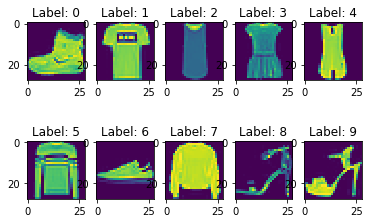

In [10]:
for i in range(10):
    plt.subplot(2,5, i+1)
    plt.title('Label: ' + str(i))
    plt.imshow(x_train[i].reshape(28,28), cmap=None)

In [11]:
x_train, x_test = x_train / 255.0, x_test / 255.0

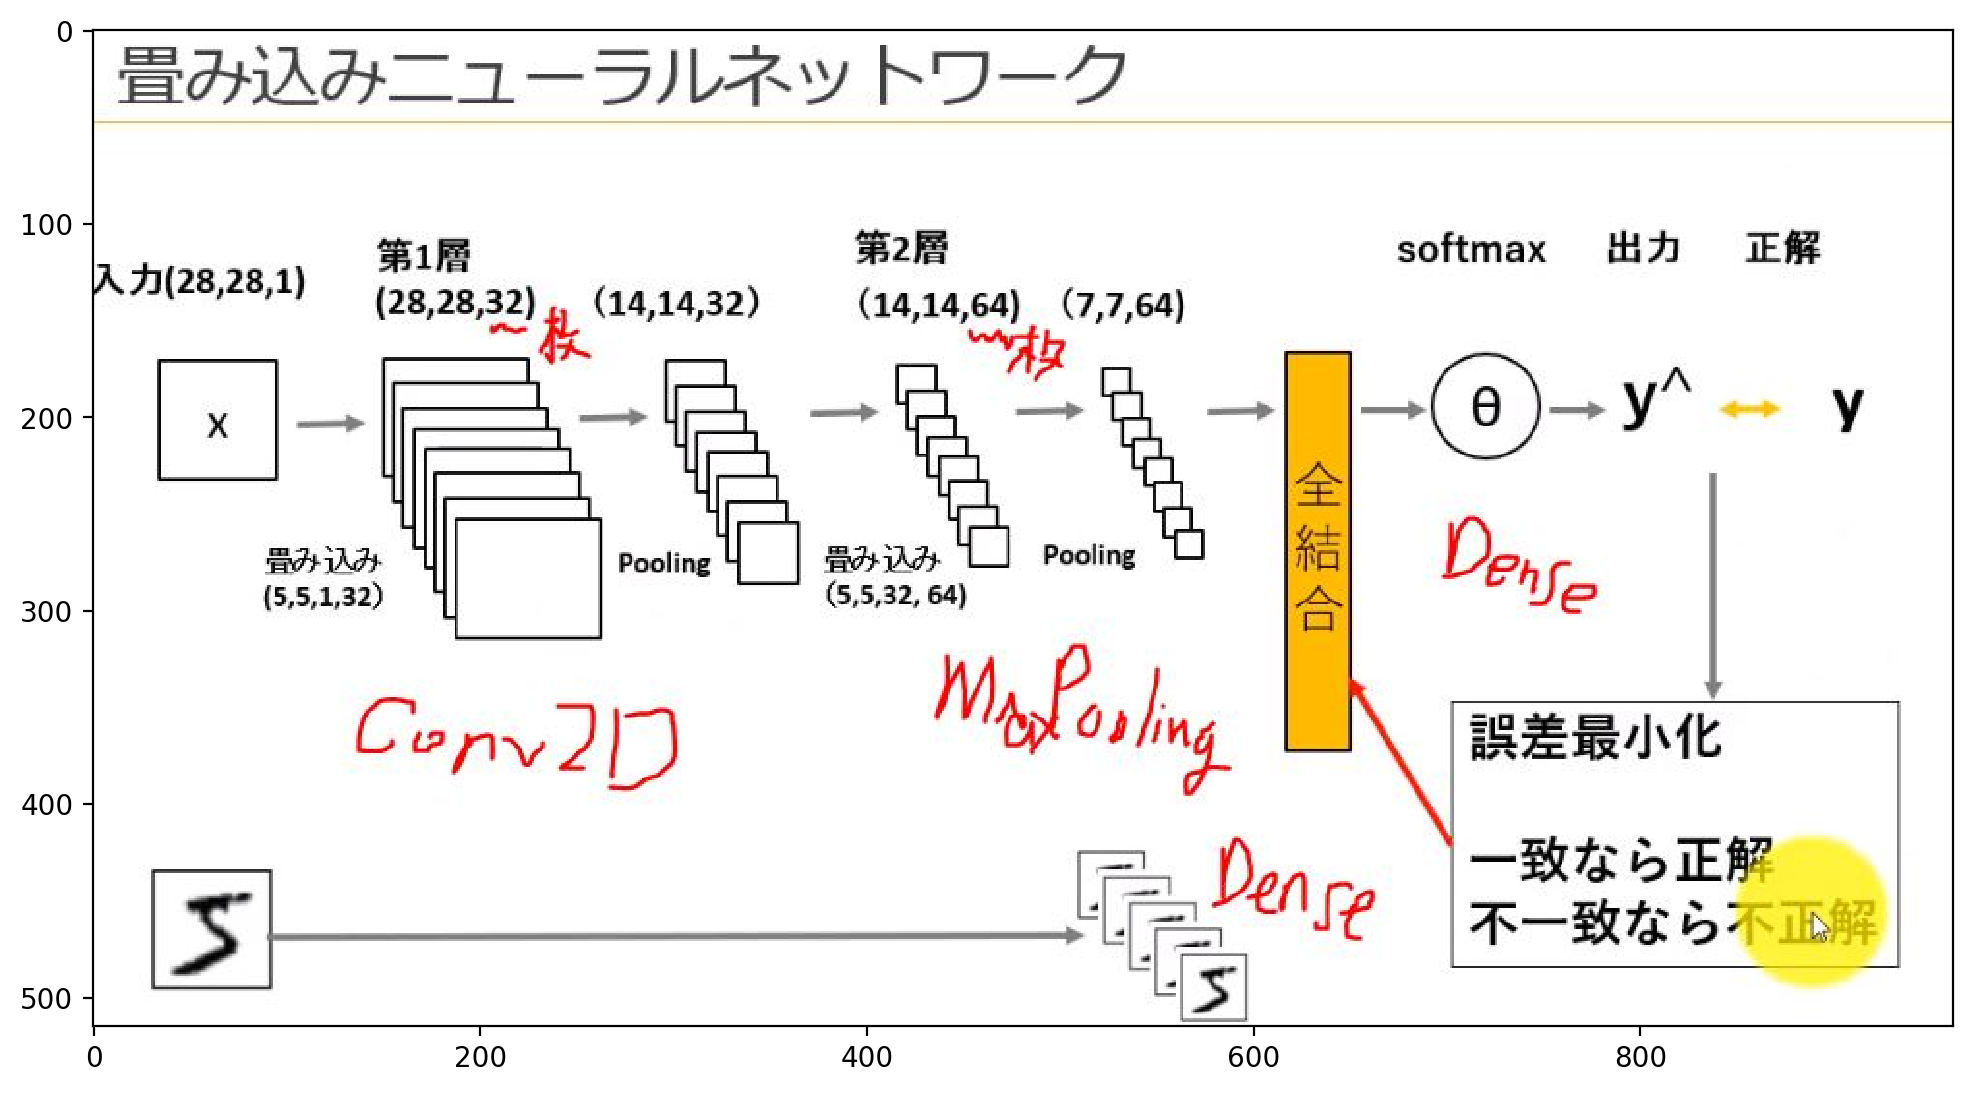

In [13]:
# 画像の表示
import cv2
img = cv2.imread("cnn.jpg")

# opencvの処理系では (B,G,R) で管理されているが、
# matplotlib では (R,G,B) で画像を認識するので、
# 表示用に一旦変換する
def imshow_origin(img):
    show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    plt.figure(figsize=(12,12),dpi=200)
    plt.imshow(show_img)
imshow_origin(img)

In [14]:
model = keras.models.Sequential([
 
#     keras.layers.Flatten(), 
#     keras.layers.Dense(512, activation='relu'),
#     keras.layers.Dropout(0.2), 
#     keras.layers.Dense(10, activation='softmax')
    
    keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=(28,28,1)), # 入力の形
    # 二次元の畳み込みを行う
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # ２つめの畳み込み
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # 画像圧縮のプーリング層　2*2に圧縮
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_class, activation='softmax')
])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 49s 812us/sample - loss: 0.4775 - acc: 0.8322
Epoch 2/10
60000/60000 [==============================] - 51s 845us/sample - loss: 0.3231 - acc: 0.8845
Epoch 3/10
60000/60000 [==============================] - 50s 841us/sample - loss: 0.2764 - acc: 0.8998
Epoch 4/10
60000/60000 [==============================] - 55s 914us/sample - loss: 0.2484 - acc: 0.9091
Epoch 5/10
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.2246 - acc: 0.9169
Epoch 6/10
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.2060 - acc: 0.9244
Epoch 7/10
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.1903 - acc: 0.9285
Epoch 8/10
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.1786 - acc: 0.9329
Epoch 9/10
60000/60000 [==============================] - 50s 829us/sample - loss: 0.1668 - acc: 0.9368
Epoch 10/10
60000/60000 [==============================] - 50s 837us/sam

In [16]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 145us/sample - loss: 0.2365 - acc: 0.9275


[0.23646440007388592, 0.9275]

In [17]:
model.predict(x_test[0:1]) # 先頭のデータを取得

array([[4.8851156e-15, 8.6580948e-19, 1.9001238e-13, 5.9087298e-17,
        4.4486272e-15, 9.8850717e-10, 5.7594529e-16, 8.0448729e-08,
        1.0819627e-16, 9.9999988e-01]], dtype=float32)